In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_users, num_movies = 0, 0
with open(r'E:\大三\大三上\An Introduction to Data Science\Homework\New\作业4\data\ratings.train.txt', 'r') as file:
    for line in file:
        user, movie, _ = map(int, line.strip().split())
        num_users = max(num_users, user)
        num_movies = max(num_movies, movie)
print(num_users, num_movies)

943 1682


In [21]:
k=20
lam=0.1
epochs=40
eta=0.01

np.random.seed(123)
P=np.random.rand(num_users,k)* np.sqrt(5/k)
Q=np.random.rand(num_movies,k)* np.sqrt(5/k)


In [7]:
def loss(R,p,q):
    loss=(R-np.dot(q,p))**2
    return loss

def regularization(p,lam):
    reg=lam*np.sum(p**2)
    return reg

In [22]:
E=[]
for i in range(0,epochs):
    Loss=0
    Reg=0
    #更新P,Q
    with open(r'E:\大三\大三上\An Introduction to Data Science\Homework\New\作业4\data\ratings.train.txt', 'r') as file:
        for line in file:
            user=int(line.split()[0])
            movie=int(line.split()[1])
            rating=float(line.split()[2])
            eplison=2*(rating-np.dot(P[user-1,:],Q[movie-1,:]))
            p=P[user-1,:]
            q=Q[movie-1,:]
            P[user-1,:]=p+eta*(eplison*q-2*lam*p)
            Q[movie-1,:]=q+eta*(eplison*p-2*lam*q)
    
    #计算Loss
    with open(r'E:\大三\大三上\An Introduction to Data Science\Homework\New\作业4\data\ratings.train.txt', 'r') as file:
        for line in file:
            user=int(line.split()[0])
            movie=int(line.split()[1])
            rating=float(line.split()[2])
            Loss=Loss+loss(rating,P[user-1,:],Q[movie-1,:])
    
    #计算正则化项
    for j in range(num_users):
        p=P[j,:]
        Reg=Reg+regularization(p,lam)
    for j in range(num_movies):
        q=Q[j,:]
        Reg=Reg+regularization(q,lam)
    print(Loss+Reg)
    
    #计算E
    E.append(Loss+Reg)
    print(f'已完成第{i+1}次循环')

83690.03814403416
已完成第1次循环
81079.4897892542
已完成第2次循环
80018.58760907406
已完成第3次循环
79028.3388469795
已完成第4次循环
77747.70627902781
已完成第5次循环
76057.17604152302
已完成第6次循环
74101.03575354154
已完成第7次循环
72117.65385236753
已完成第8次循环
70208.92424573985
已完成第9次循环
68377.87933683197
已完成第10次循环
66623.51784916318
已完成第11次循环
64960.56790661327
已完成第12次循环
63407.27712180466
已完成第13次循环
61975.26011242628
已完成第14次循环
60667.39434778155
已完成第15次循环
59480.065476832315
已完成第16次循环
58406.045034336996
已完成第17次循环
57436.53097465694
已完成第18次循环
56562.29202294767
已完成第19次循环
55774.244708400576
已完成第20次循环
55063.73854249403
已完成第21次循环
54422.70040078739
已完成第22次循环
53843.705926797404
已完成第23次循环
53320.00640800769
已完成第24次循环
52845.5247485756
已完成第25次循环
52414.82944112212
已完成第26次循环
52023.093783134966
已完成第27次循环
51666.04643478206
已完成第28次循环
51339.91817975569
已完成第29次循环
51041.388473538966
已完成第30次循环
50767.53419500276
已完成第31次循环
50515.782055723685
已完成第32次循环
50283.86539694219
已完成第33次循环
50069.785599102084
已完成第34次循环
49871.77800417915
已完成第35次循环
49688.28206163015
已完成第36

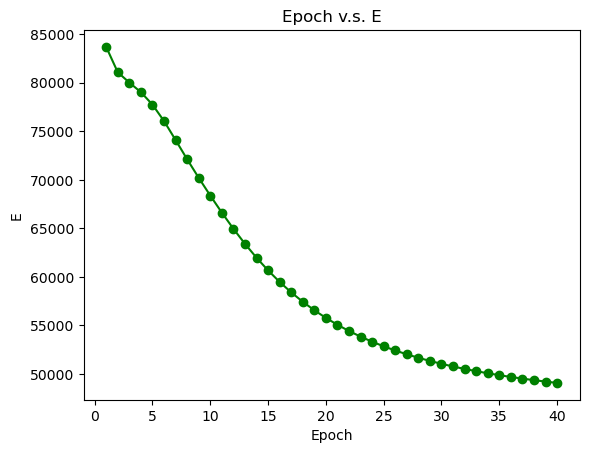

In [27]:
plt.plot(range(1, epochs + 1), E, marker='o',color='green')
plt.xlabel('Epoch')
plt.ylabel('E')
plt.title('Epoch v.s. E')
plt.show()